make statistics of patients counts:

In [3]:
# view number of annotations per patient
import os
data_files = os.listdir('../dicom_sagittal_2dimages/')
txt_files = [i for i in data_files if i.endswith('.txt')]
patients_files = [i.split('_')[0] for i in txt_files]
patients = sorted(list(set(patients_files)))
patients = {i:patients_files.count(i) for i in patients}
acc = 0
count_annotations = 0
for patient in patients:
    print(f"{patient} count: {patients[patient]}; percent: {round(patients[patient]/sum(patients.values())*100, 2)}%")
    count_annotations += patients[patient]
    acc += round(patients[patient]/sum(patients.values())*100, 2)
    print(f"Total: {acc}%")

print(f"-----------------------------------")
print(f"Total patients: {len(patients)}")
print(f"Total annotations: {count_annotations}")
print(f"Averaged annotations per patient: {count_annotations/len(patients)}")
print(f"Average percent of annotations per patient: {acc/len(patients)}%")

patient001 count: 26; percent: 1.83%
Total: 1.83%
patient002 count: 26; percent: 1.83%
Total: 3.66%
patient003 count: 26; percent: 1.83%
Total: 5.49%
patient004 count: 32; percent: 2.25%
Total: 7.74%
patient005 count: 36; percent: 2.54%
Total: 10.280000000000001%
patient006 count: 37; percent: 2.61%
Total: 12.89%
patient007 count: 20; percent: 1.41%
Total: 14.3%
patient008 count: 25; percent: 1.76%
Total: 16.060000000000002%
patient009 count: 51; percent: 3.59%
Total: 19.650000000000002%
patient010 count: 73; percent: 5.14%
Total: 24.790000000000003%
patient011 count: 14; percent: 0.99%
Total: 25.78%
patient012 count: 44; percent: 3.1%
Total: 28.880000000000003%
patient013 count: 55; percent: 3.87%
Total: 32.75%
patient014 count: 52; percent: 3.66%
Total: 36.41%
patient015 count: 58; percent: 4.08%
Total: 40.489999999999995%
patient016 count: 25; percent: 1.76%
Total: 42.24999999999999%
patient017 count: 29; percent: 2.04%
Total: 44.28999999999999%
patient018 count: 43; percent: 3.03%


patient033_-5_0.txt


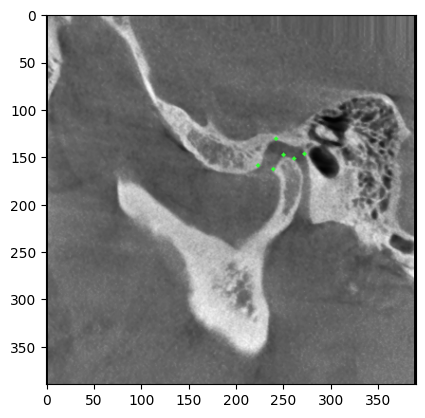

patient026_-6_0.txt


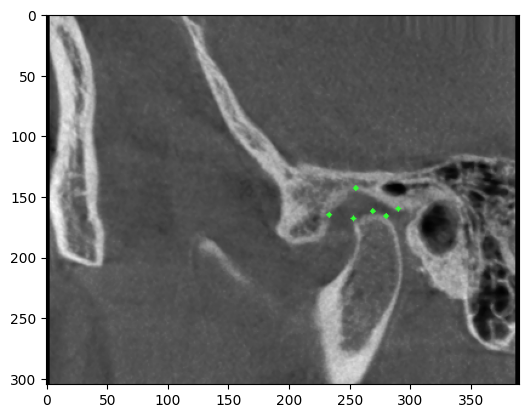

patient015_3_375.txt


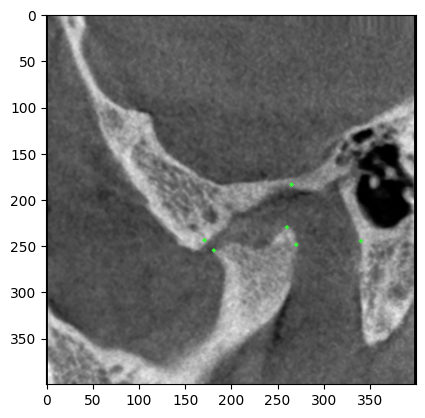

patient010_1_75.txt


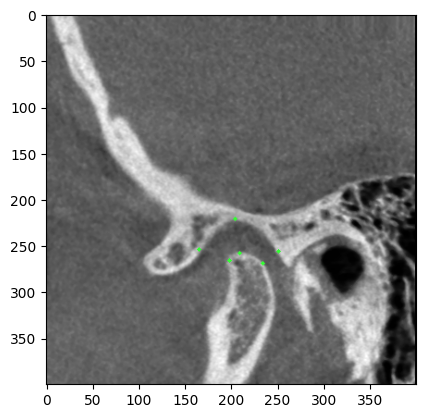

patient002_-11_6.txt


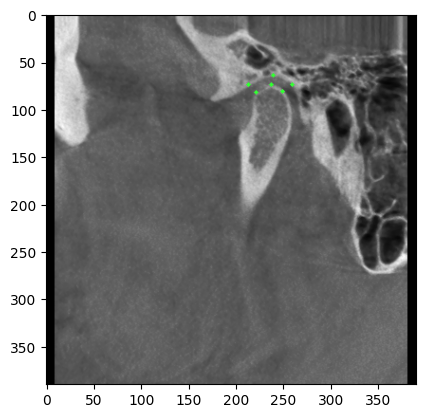

patient020_-11_4.txt


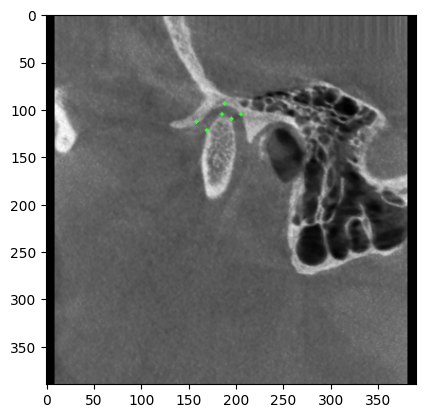

patient005_5_8.txt


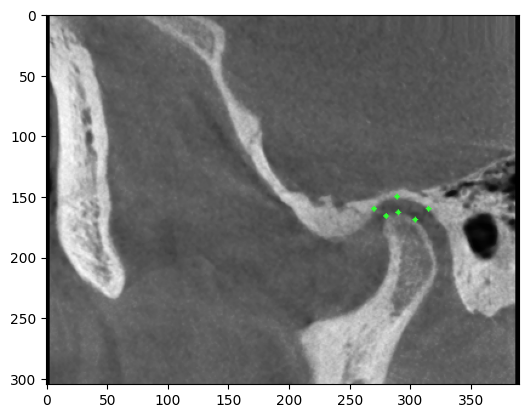

patient021_9_0.txt


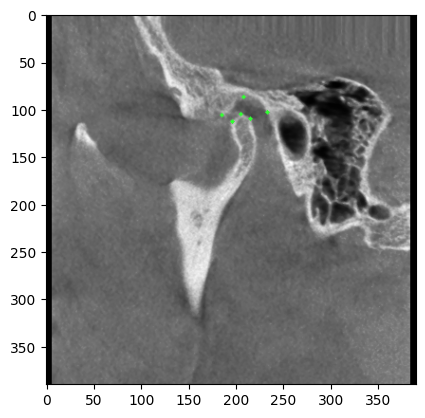

patient027_1_8.txt


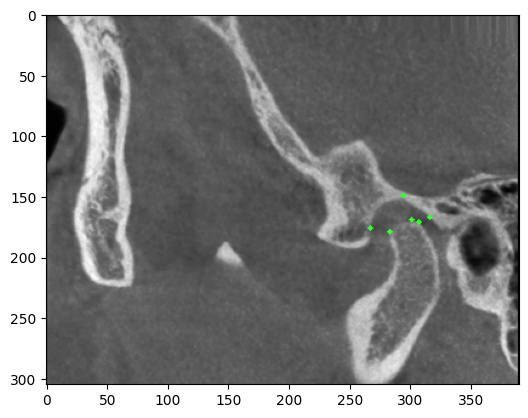

patient014_6_25.txt


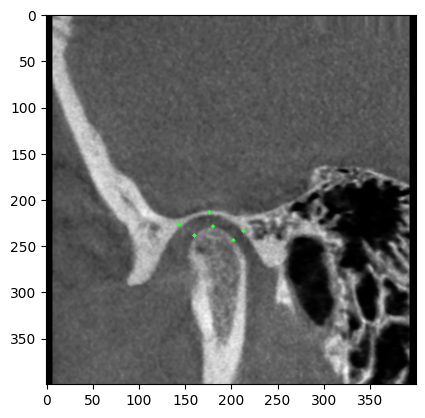

patient007_11_6.txt


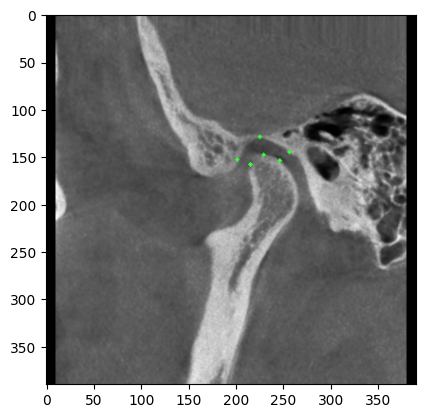

patient009_-3_2.txt


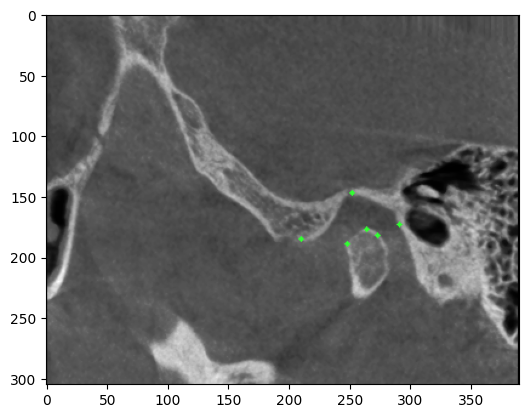

patient032_5_4.txt


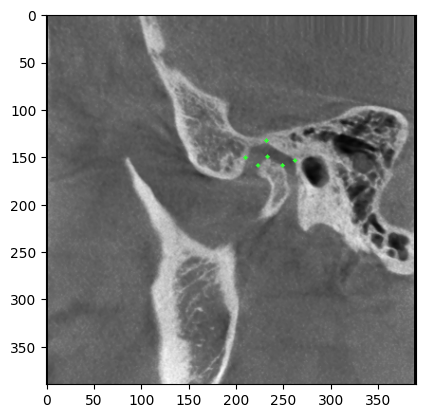

patient012_-2_25.txt


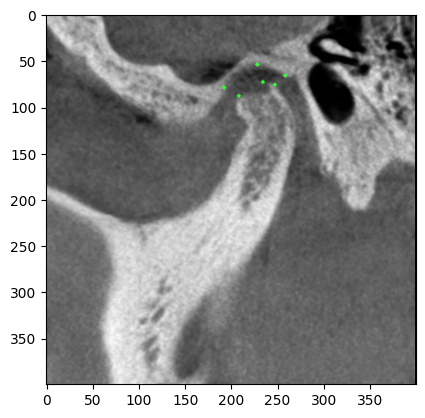

patient035_6_2.txt


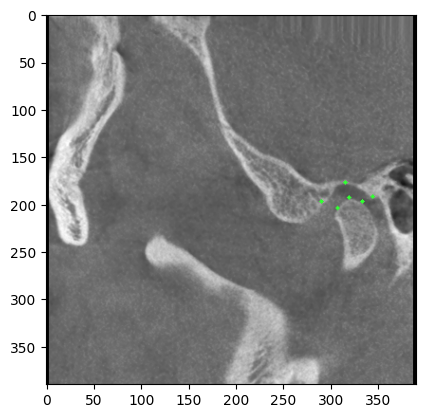

patient024_0_0.txt


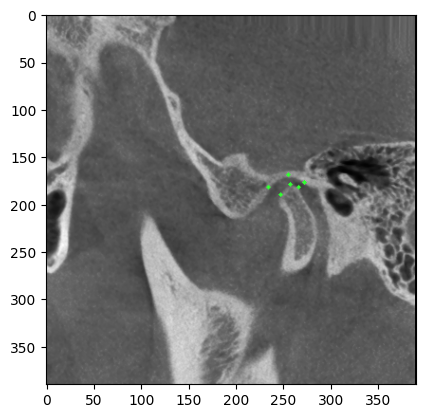

patient018_-5_2.txt


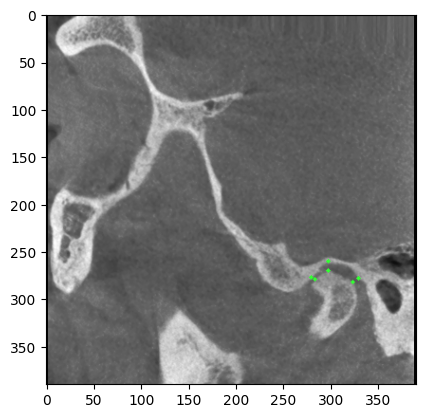

patient030_0_4.txt


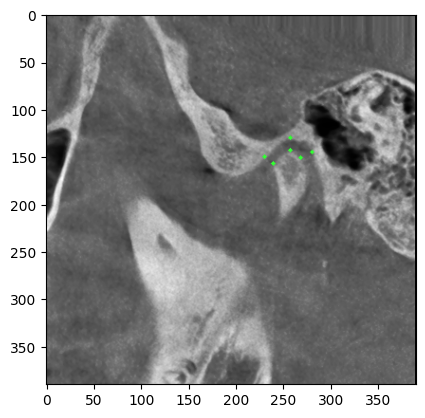

patient025_-2_4.txt


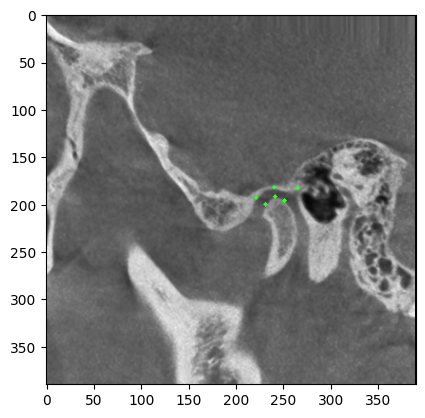

patient016_-13_2.txt


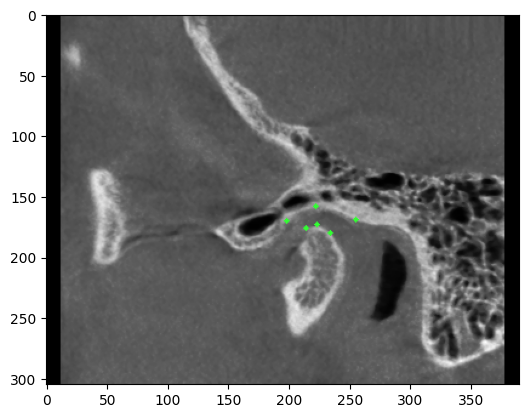

patient006_0_4.txt


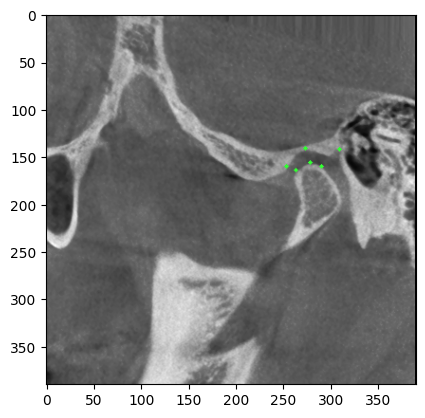

patient001_20_2.txt


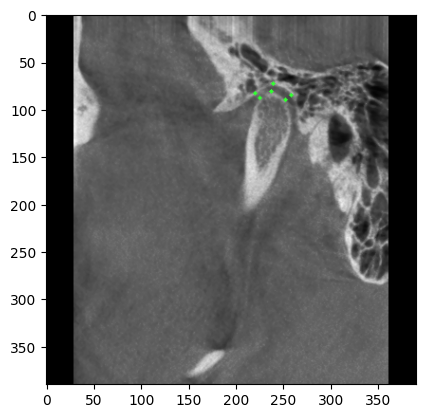

patient022_7_0.txt


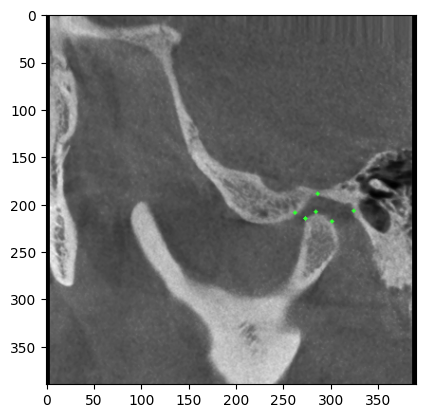

patient036_-0_6.txt


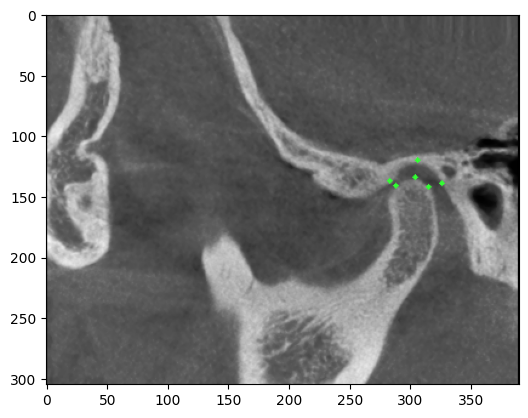

patient004_-7_8.txt


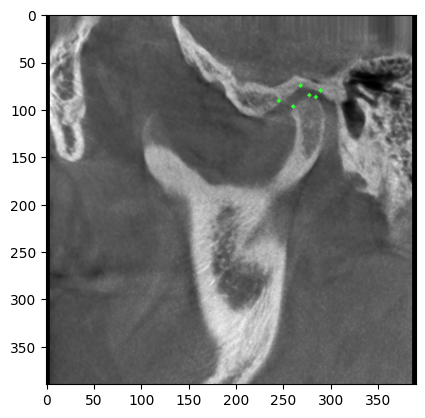

patient029_5_4.txt


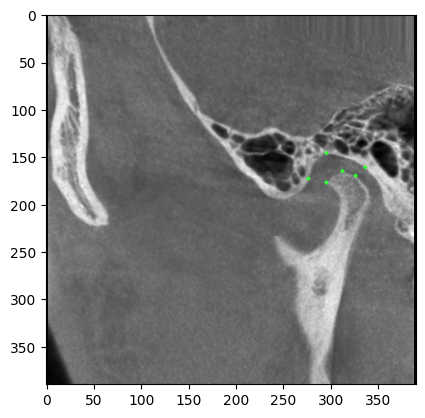

patient019_1_6.txt


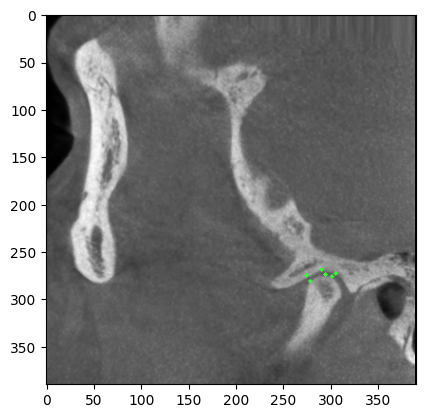

patient013_8_5.txt


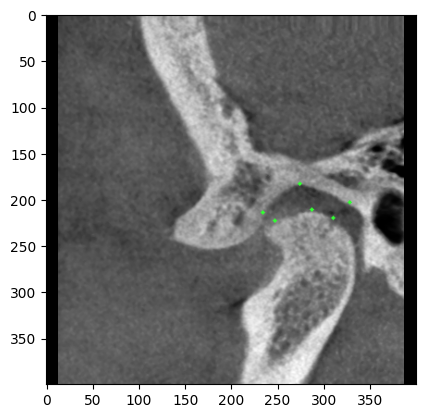

patient017_6_4.txt


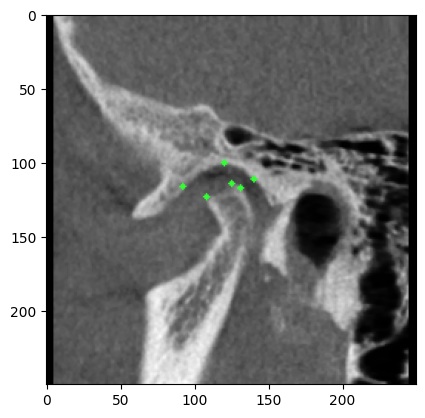

patient008_-3_2.txt


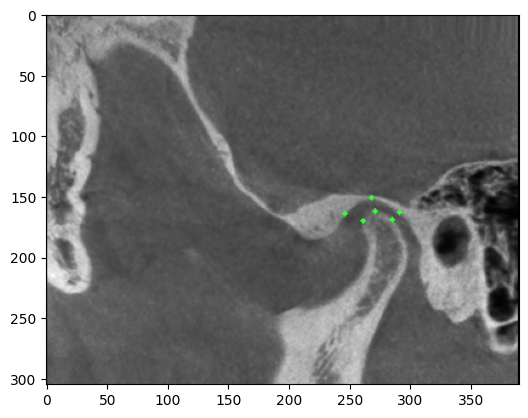

patient028_-15_2.txt


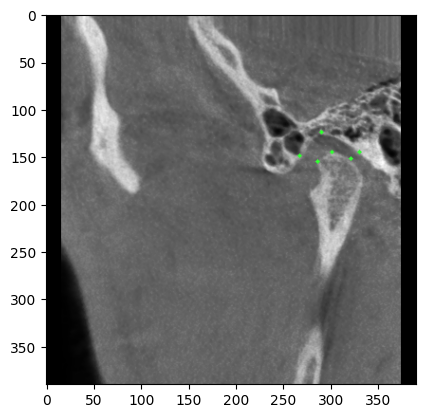

patient011_-0_6.txt


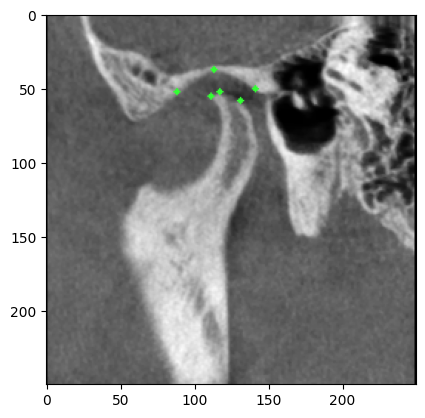

patient003_-5_2.txt


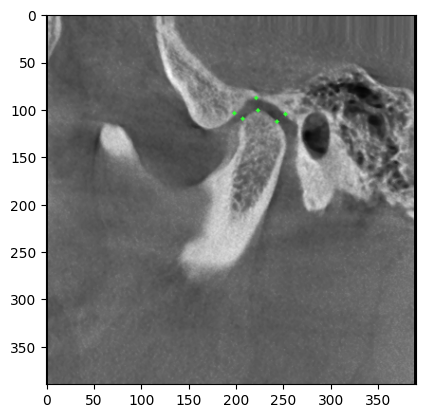

patient034_-2_2.txt


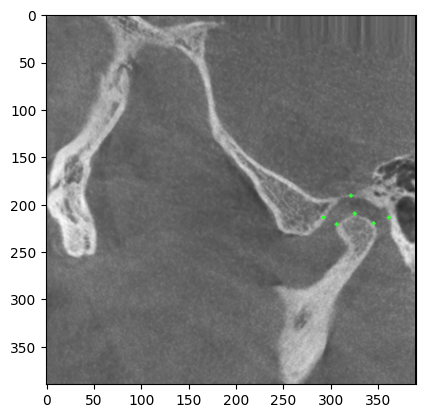

patient031_1_8.txt


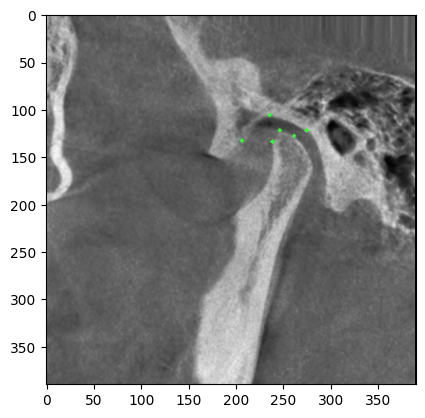

patient023_-9_6.txt


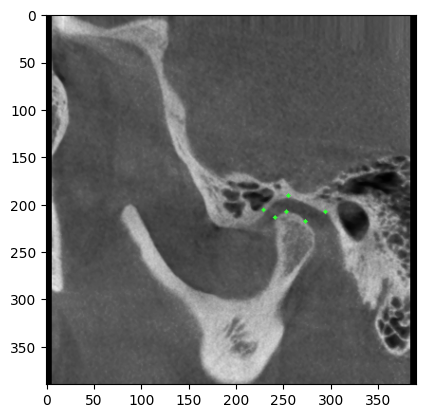

In [9]:
import random
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# view patient range with labels:
txt_files = os.listdir("../dicom_sagittal_2dimages")
txt_files = list(filter(lambda s: s.lower().startswith('patient') and s.lower().endswith(".txt"), txt_files))
patient_names = [i.split('_', 1)[0] for i in txt_files]
patient_names = sorted(list(set(patient_names)))

random.seed(42)
txt_files = os.listdir("../dicom_sagittal_2dimages")
txt_files = sorted(list(filter(lambda s: s.lower().startswith('patient') and s.lower().endswith(".txt"), txt_files)))
patient_counts = {patient_name: 0 for patient_name in patient_names}
# 5 sample images of each patient
random.shuffle(txt_files)
for i in txt_files:
    patient = i.split('_', 1)[0]
    if patient_counts[patient] < 1:
        print(i)
        slice = i.split('_', 1)[1].split('.', 1)[0]
        path_to_im = "../dicom_sagittal_2dimages/" + patient + "_" + slice + ".png"
        im = cv2.imread(path_to_im)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # read labels and add to image:
        path_to_labels = "../dicom_sagittal_2dimages/" + patient + "_" + slice + ".txt"
        # read txt as csv
        df = pd.read_csv(path_to_labels, sep='\t', header=None)
        # convert to numpy array
        labels = df.to_numpy()
        # add labels to image:
        for i in labels:
            # add annotation to image as small red circle, where radius is 2
            cv2.circle(im, (int(i[0]), int(i[1])), 2, (50, 255, 50), -1)
        plt.imshow(im)
        plt.show()
        patient_counts[patient] += 1